In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-multilearn==0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 6.1 MB/s eta 0:00:00


In [3]:
# import pandas as pd
# import tensorflow as tf
# import numpy as np
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from skmultilearn.adapt import MLkNN
# import sklearn.metrics as metrics
# from sklearn.metrics import hamming_loss, accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import multilabel_confusion_matrix
# import os
# import keras
# from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import LSTM, Activation, Dropout, Dense, Flatten, Bidirectional, GRU, concatenate, SpatialDropout1D
# from keras.layers import Flatten, LSTM
# from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
# from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
# from keras.models import Model
# from keras.layers import Embedding
# from sklearn.model_selection import train_test_split
# from keras.layers import Input
# from keras.layers import Concatenate
# import matplotlib.pyplot as plt
# from keras import layers
# from keras.optimizers import Adam,SGD,RMSprop
# from keras.losses import MeanSquaredError
# import nltk
# import string
# import re
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [15]:
# Data Handling
import os
import re
import string
import numpy as np
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

# NLP Preprocessing
# import nltk
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Machine Learning & Model Evaluation
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report, f1_score, precision_score, recall_score,
    confusion_matrix, accuracy_score
)
# from skmultilearn.adapt import MLkNN

# Deep Learning (Keras & TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Activation, Concatenate
)
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
d1= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_en_l1.csv')
d2= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_en_l2.csv')
d3= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_en_l3.csv')
d1

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN


The label column is created in the original training dataset by taking the majority occurence of 0 or 1 among all the 6 annotators in columns - 'en_a1',
 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6'.

## Word Pre-Processing

In [17]:
# Word Pre-Processing

def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text

d1['text'] = d1['text'].apply(lambda x: normalize_text(x))
d2['text'] = d2['text'].apply(lambda x: normalize_text(x))
d3['text'] = d3['text'].apply(lambda x: normalize_text(x))


# Train Test Splits

In [18]:
X1 = list(d1['text'])
X2 = list(d2['text'])
X3 = list(d3['text'])

col_lst = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']
for col in col_lst:
    d1[col] = pd.to_numeric(d1[col], errors='coerce')
    d2[col] = pd.to_numeric(d2[col], errors='coerce')
    d3[col] = pd.to_numeric(d3[col], errors='coerce')

d1['label'] = d1[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values
d2['label'] = d2[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values
d3['label'] = d3[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values

d1 = d1.drop(col_lst, axis=1)
d2 = d2.drop(col_lst, axis=1)
d3 = d3.drop(col_lst, axis=1)

d1['label'] = d1['label'].astype(int)
d2['label'] = d2['label'].astype(int)
d3['label'] = d3['label'].astype(int)

d1 = d1[['label', 'text']]
d2 = d2[['label', 'text']]
d3 = d3[['label', 'text']]
d2

,label,text
0,0,this is our history for shia and sunni ...
1,1,if this is grilling then wht wud u call t...
2,0,look at madam locals attacked no religion...
3,1,our beloved yogi ji has given money home and...
4,1,i gonna kill that bitch bitvj imma kill you...
...,...,...
6526,0,“mama let’s research” bitch suck my dick
6527,0,i was by myself and it was her and her bitch ...
6528,0,i just seen a comment and bitch im cryinnnnnn...
6529,1,boys only luxury ...


In [19]:
y_data1 = d1["label"]
y_data2 = d2["label"]
y_data3 = d3["label"]
# print(y_data)
y1 = y_data1.values
y2 = y_data2.values
y3 = y_data3.values
print(y1)
print(len(y1))
print(y2)
print(len(y2))
print(y3)
print(len(y3))

[0 1 0 ... 0 1 0]
6531
[0 1 0 ... 0 1 0]
6531
[0 1 0 ... 0 1 0]
6531


# Model CNN & Bi-LSTM

In [20]:
#Model CNN & Bi-LSTM
######## Textual Features for Embedding ###################
max_len = 100
max_features = 4479
embed_size = 300
tokenizer1 = Tokenizer(num_words=max_features)
tokenizer2 = Tokenizer(num_words=max_features)
tokenizer3 = Tokenizer(num_words=max_features)

tokenizer1.fit_on_texts(list(X1))
tokenizer2.fit_on_texts(list(X2))
tokenizer3.fit_on_texts(list(X3))

X1 = tokenizer1.texts_to_sequences(X1)
X2 = tokenizer2.texts_to_sequences(X2)
X3 = tokenizer3.texts_to_sequences(X3)

X1 = pad_sequences(X1, padding='post', maxlen=max_len)
X2 = pad_sequences(X2, padding='post', maxlen=max_len)
X3 = pad_sequences(X3, padding='post', maxlen=max_len)

In [21]:
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
y1 = label_encoder1.fit_transform(y1)
y2 = label_encoder2.fit_transform(y2)
y3 = label_encoder3.fit_transform(y3)
y1
# print(len(y))

array([0, 1, 0, ..., 0, 1, 0])

In [22]:
X1

array([[  12,    6,   68, ...,    0,    0,    0],
       [  34,   12,    6, ...,    0,    0,    0],
       [ 159,   64,  240, ...,    0,    0,    0],
       ...,
       [  10,   42,  385, ...,    0,    0,    0],
       [1157,   69, 4059, ...,    0,    0,    0],
       [ 293,   27,   19, ...,    0,    0,    0]], dtype=int32)

In [23]:
print(len(X1))

6531


In [24]:
y1 = to_categorical(y1, num_classes=2)
y2 = to_categorical(y2, num_classes=2)
y3 = to_categorical(y3, num_classes=2)
y1

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [25]:
embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/NLP_Project/NLP/glove.42B.300d.txt', encoding="utf8") ## using pre-trained or self-trained embeddings ##

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

vocab_size1 = len(tokenizer1.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer1.word_index
num_words = min(max_features,len(word_index)+1)

embedding_matrix = zeros((num_words, embed_size)) ## has to be similar to glove dimension ##
for word, index in tokenizer1.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else:
        embedding_matrix[index] = embeddings_dictionary["unk"]

In [26]:
embedding_matrix.shape

(4479, 300)

# Model Training

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 35s 171ms/step - accuracy: 0.7206 - loss: 0.5990 - precision: 0.7206 - recall: 0.7206 - val_accuracy: 0.7911 - val_loss: 0.5110 - val_precision: 0.7911 - val_recall: 0.7911
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.7971 - loss: 0.5018 - precision: 0.7971 - recall: 0.7971 - val_accuracy: 0.7896 - val_loss: 0.5108 - val_precision: 0.7896 - val_recall: 0.7896
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 23s 137ms/step - accuracy: 0.7826 - loss: 0.5135 - precision: 0.7826 - recall: 0.7826 - val_accuracy: 0.7919 - val_loss: 0.4977 - val_precision: 0.7919 - val_recall: 0.7919
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.7784 - loss: 0.4943 - precision: 0.7784 - recall: 0.7784 - val_accuracy: 0.8018 - val_loss: 0.4724 - val_precision: 0.8018 - val_recall: 0.8018
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.7906 - loss: 0.4722 - precision: 0.7906 - recall: 0.7906 - val_accuracy: 0.8011

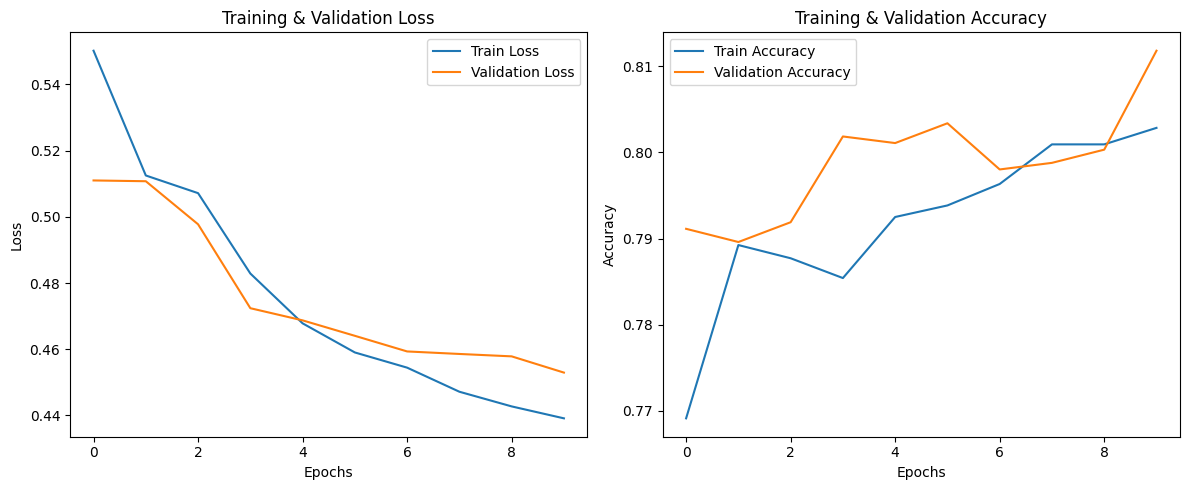

In [28]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall, AUC

X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2, random_state=None)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=None)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y3, test_size=0.2, random_state=None)

num_classes = 2
epochs = 10
batch_size = 32


model1 = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),  # Freeze embedding layer
    SimpleRNN(256),  # Basic LSTM layer with 64 units
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation="softmax")  # Output layer
])




model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate model
y_pred1 = np.argmax(model1.predict(X_val1), axis=1)
y_val_labels1 = np.argmax(y_val1, axis=1)
print(classification_report(y_val_labels1, y_pred1, target_names=["Hate", "Not Hate"]))

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [29]:

# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels1, y_pred1, average='weighted')
precision = precision_score(y_val_labels1, y_pred1, average='weighted')
recall = recall_score(y_val_labels1, y_pred1, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.7759118720598707
Precision: 0.7852790132328904
Recall: 0.8117827084927315


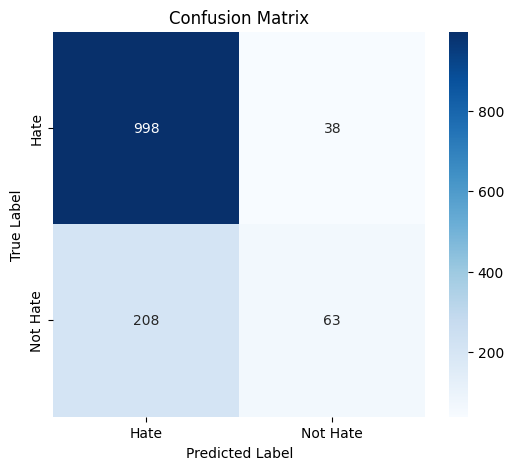

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_val_labels1, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate", "Not Hate"], yticklabels=["Hate", "Not Hate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 54s 315ms/step - accuracy: 0.6343 - loss: 0.6523 - val_accuracy: 0.6771 - val_loss: 0.6069
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 55s 334ms/step - accuracy: 0.6819 - loss: 0.6006 - val_accuracy: 0.6809 - val_loss: 0.5901
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.7007 - loss: 0.5788 - val_accuracy: 0.6901 - val_loss: 0.5836
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 321ms/step - accuracy: 0.7188 - loss: 0.5597 - val_accuracy: 0.6817 - val_loss: 0.5899
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 52s 319ms/step - accuracy: 0.7179 - loss: 0.5626 - val_accuracy: 0.6779 - val_loss: 0.5912
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 312ms/step - accuracy: 0.7344 - loss: 0.5369 - val_accuracy: 0.6840 - val_loss: 0.5839
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 84s 327ms/step - accuracy: 0.7392 - loss: 0.5299 - val_accuracy: 0.6748 - val_loss: 0.5920
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 53s 323ms/step - accuracy: 0.7514 - loss: 0

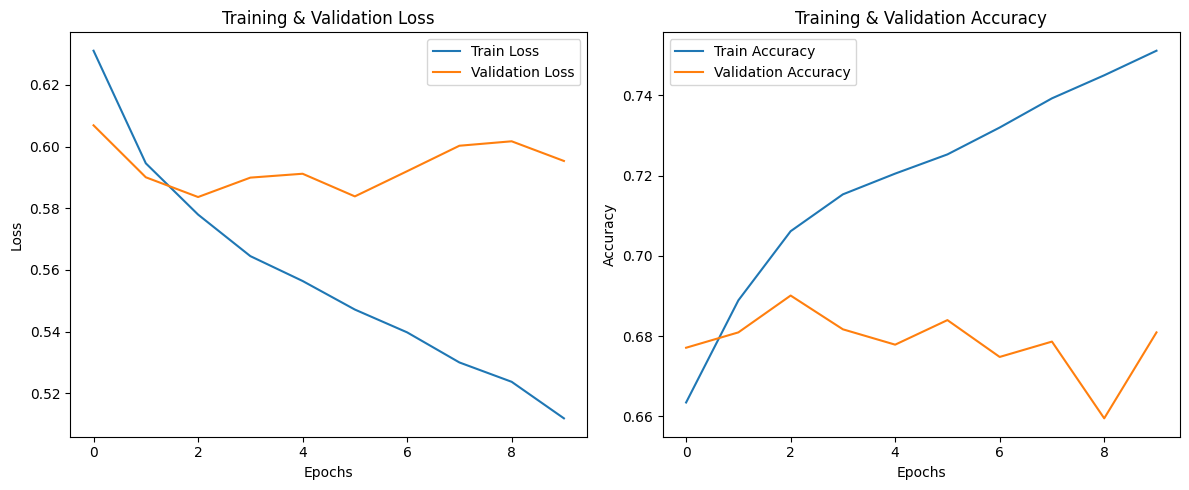

In [31]:
model2 = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),  # Freeze embedding layer
    SimpleRNN(512),  # Basic LSTM layer with 64 units
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation="softmax")  # Output layer
])

model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

history2 = model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=epochs, batch_size=batch_size, verbose=1)


# Evaluate model
y_pred2 = np.argmax(model2.predict(X_val2), axis=1)
y_val_labels2 = np.argmax(y_val2, axis=1)
print(classification_report(y_val_labels2, y_pred2, target_names=["Hate", "Not Hate"]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



In [32]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels2, y_pred2, average='weighted')
precision = precision_score(y_val_labels2, y_pred2, average='weighted')
recall = recall_score(y_val_labels2, y_pred2, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.6641663065666821
Precision: 0.6619039796162979
Recall: 0.6809487375669472


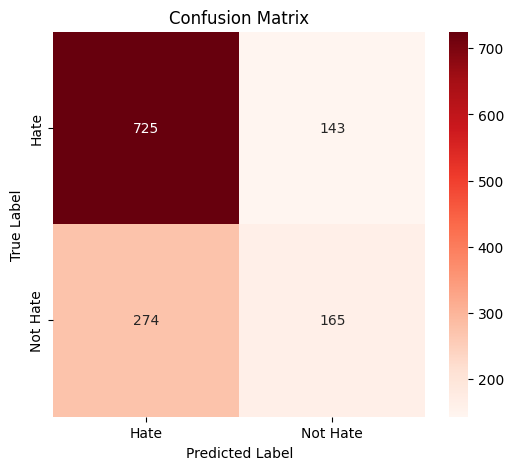

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_val_labels2, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Hate", "Not Hate"], yticklabels=["Hate", "Not Hate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 54s 315ms/step - accuracy: 0.6266 - loss: 0.6614 - val_accuracy: 0.6389 - val_loss: 0.6226
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 53s 322ms/step - accuracy: 0.6652 - loss: 0.6151 - val_accuracy: 0.6588 - val_loss: 0.6073
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 309ms/step - accuracy: 0.6732 - loss: 0.5946 - val_accuracy: 0.6695 - val_loss: 0.5889
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 312ms/step - accuracy: 0.6913 - loss: 0.5779 - val_accuracy: 0.6626 - val_loss: 0.5874
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 318ms/step - accuracy: 0.6878 - loss: 0.5733 - val_accuracy: 0.6695 - val_loss: 0.5844
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 322ms/step - accuracy: 0.7060 - loss: 0.5645 - val_accuracy: 0.6679 - val_loss: 0.5887
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 320ms/step - accuracy: 0.7102 - loss: 0.5531 - val_accuracy: 0.6679 - val_loss: 0.5867
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 318ms/step - accuracy: 0.7212 - loss: 0

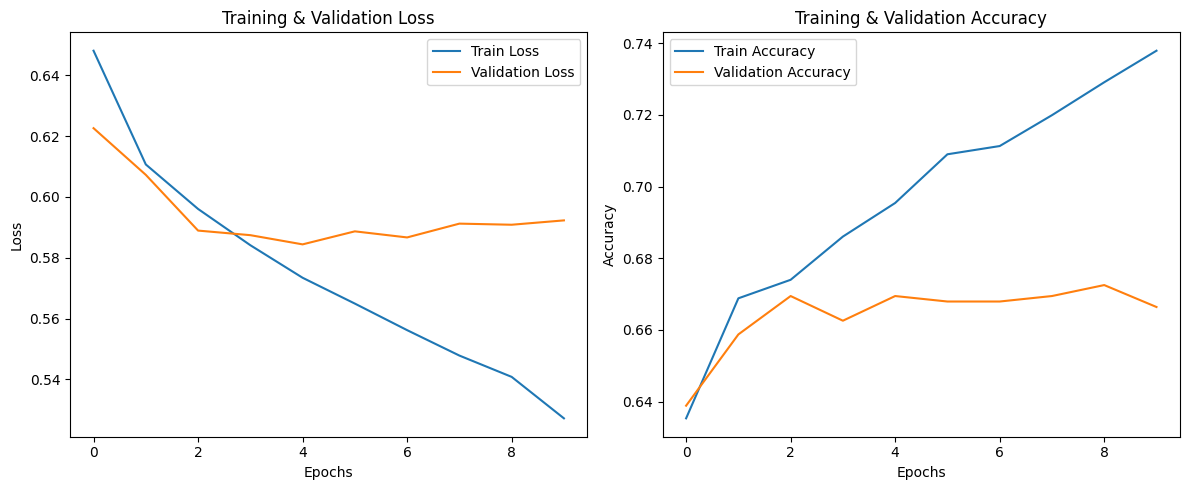

In [34]:
model3 = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),  # Freeze embedding layer
    SimpleRNN(512),  # Basic LSTM layer with 64 units
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation="softmax")  # Output layer
])

model3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])


history3 = model3.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=epochs, batch_size=batch_size, verbose=1)


# Evaluate model
y_pred3 = np.argmax(model3.predict(X_val3), axis=1)
y_val_labels3 = np.argmax(y_val3, axis=1)
print(classification_report(y_val_labels3, y_pred3, target_names=["Hate", "Not Hate"]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


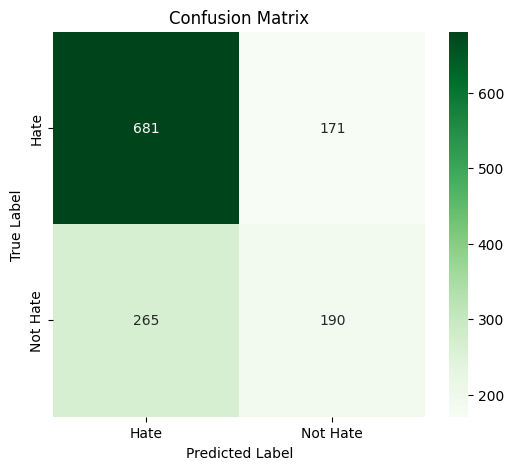

In [35]:
# Compute confusion matrix
cm = confusion_matrix(y_val_labels3, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Hate", "Not Hate"], yticklabels=["Hate", "Not Hate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [36]:
# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels3, y_pred3, average='weighted')
precision = precision_score(y_val_labels3, y_pred3, average='weighted')
recall = recall_score(y_val_labels3, y_pred3, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.6559176456003251
Precision: 0.652490901377651
Recall: 0.6664116296863045


In [37]:
model1.save('/content/drive/MyDrive/NLP_Project/NLP/SimpleRNN_en_1.keras')
model2.save('/content/drive/MyDrive/NLP_Project/NLP/SimpleRNN_en_2.keras')
model3.save('/content/drive/MyDrive/NLP_Project/NLP/SimpleRNN_en_3.keras')

# Testing on Unseen Data

In [38]:
vv_1= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/test_en_l1.csv')
vv_2= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/test_en_l2.csv')
vv_3= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/test_en_l3.csv')
vv_1


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"""who's this tweet about"" bitch it's about you ...",question_1,NaN,0.0,NaN,NaN,0.0,1.0
1,#AlkaLamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_1,NaN,NaN,1.0,NaN,1.0,1.0
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_1,NaN,1.0,1.0,NaN,1.0,NaN
4,***Let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0
1103,“The limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_1,NaN,NaN,0.0,NaN,0.0,1.0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_1,NaN,NaN,1.0,NaN,1.0,1.0


In [39]:
vv1=vv_1
vv2=vv_2
vv3=vv_3

In [41]:
from tensorflow import keras
from tensorflow.keras.models import load_model

model1 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/NLP/SimpleRNN_en_1.keras')
model2 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/NLP/SimpleRNN_en_2.keras')
model3 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/NLP/SimpleRNN_en_3.keras')


In [42]:
vv_1['text'] = vv_1['text'].apply(lambda x: normalize_text(x))
vv_2['text'] = vv_2['text'].apply(lambda x: normalize_text(x))
vv_3['text'] = vv_3['text'].apply(lambda x: normalize_text(x))
# vv['text'] = vv['text'].apply(lambda x: normalize_text_2(x))
vv_1 = vv_1[['text']]
vv_2 = vv_2[['text']]
vv_3 = vv_3[['text']]
vv_1.columns = ['text']
vv_2.columns = ['text']
vv_3.columns = ['text']
vv_1

,text
0,who s this tweet about bitch it s about you ...
1,alkalamba should’ve used her slippers to slap...
2,coronavillains covididiot is a do...
3,acts like the female governors of stat...
4,let us celebrate “secular” as a beautiful w...
...,...
1102,you should be tired of not having any kind of ...
1103,“the limits of tyrants are prescribed by the e...
1104,like wtf my symbol is and i’m a crab and we...
1105,marry a millionaire guy divorce get half hi...


In [43]:
######## Textual Features for Embedding ###################

sequence1 = tokenizer1.texts_to_sequences(vv_1.text)
sequence1 = pad_sequences(sequence1, padding='post', maxlen=max_len)

sequence2 = tokenizer2.texts_to_sequences(vv_2.text)
sequence2 = pad_sequences(sequence2, padding='post', maxlen=max_len)

sequence3 = tokenizer3.texts_to_sequences(vv_3.text)
sequence3 = pad_sequences(sequence3, padding='post', maxlen=max_len)

In [44]:
sequence1 = tokenizer1.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence1 = pad_sequences(sequence1, padding='post', maxlen = max_len)

sequence2 = tokenizer2.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence2 = pad_sequences(sequence2, padding='post', maxlen = max_len)

sequence3 = tokenizer3.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence3 = pad_sequences(sequence3, padding='post', maxlen = max_len)



In [45]:
predictions1 = model1.predict(sequence1)
classes1 = np.argmax(predictions1, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


In [46]:
predictions2 = model2.predict(sequence2)
classes2 = np.argmax(predictions2, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


In [47]:
predictions3 = model3.predict(sequence3)
classes3 = np.argmax(predictions3, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step


In [48]:
predictions1

array([[0.56052643, 0.4394736 ],
       [0.5228139 , 0.477186  ],
       [0.5180746 , 0.48192537],
       ...,
       [0.5595508 , 0.44044918],
       [0.85455185, 0.14544816],
       [0.74580467, 0.25419533]], dtype=float32)

In [49]:
print(len(predictions1))

1107


In [50]:
# Assign label 0 if the left probability is higher, otherwise label 1
predictions1 = np.argmax(predictions1, axis=1)
predictions2 = np.argmax(predictions2, axis=1)
predictions3 = np.argmax(predictions3, axis=1)
# predictions = 1 - predictions

# Display the resulting array of predictions
print(predictions1)

[0 0 0 ... 0 0 0]


In [51]:
print(len(predictions1))

1107


In [52]:
vv1

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,who s this tweet about bitch it s about you ...,question_1,NaN,0.0,NaN,NaN,0.0,1.0
1,alkalamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN
2,coronavillains covididiot is a do...,question_1,NaN,NaN,1.0,NaN,1.0,1.0
3,acts like the female governors of stat...,question_1,NaN,1.0,1.0,NaN,1.0,NaN
4,let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0
1103,“the limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN
1104,like wtf my symbol is and i’m a crab and we...,question_1,NaN,NaN,0.0,NaN,0.0,1.0
1105,marry a millionaire guy divorce get half hi...,question_1,NaN,NaN,1.0,NaN,1.0,1.0


In [53]:
# X = list(vv1['text'])
#y = np.asarray(d1[d1.columns[1:]])
col_lst = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']
for col in col_lst:
    vv1[col] = pd.to_numeric(vv1[col], errors='coerce')
    vv2[col] = pd.to_numeric(vv2[col], errors='coerce')
    vv3[col] = pd.to_numeric(vv3[col], errors='coerce')


vv1['label'] = vv1[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values
vv2['label'] = vv2[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values
vv3['label'] = vv3[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values

vv1['label'] = vv1['label'].astype(int)
vv2['label'] = vv2['label'].astype(int)
vv3['label'] = vv3['label'].astype(int)

vv1 = vv1[['label', 'text']]
vv2 = vv2[['label', 'text']]
vv3 = vv3[['label', 'text']]
vv1

true_1 = vv1["label"]
true_2 = vv2["label"]
true_3 = vv3["label"]
# print(true_)
y_test_1 = true_1.values
y_test_2 = true_2.values
y_test_3 = true_3.values
print(y_test_1)
print(len(y_test_1))

[1 0 1 ... 1 1 1]
1107


In [54]:
ids = np.arange(1, len(y_test_1)+1)
result_df_1 = pd.DataFrame({'id': ids, 'prediction': predictions1, 'true': y_test_1})
# result_df_1

ids = np.arange(1, len(y_test_2)+1)
result_df_2 = pd.DataFrame({'id': ids, 'prediction': predictions2, 'true': y_test_2})
# result_df_2

ids = np.arange(1, len(y_test_3)+1)
result_df_3 = pd.DataFrame({'id': ids, 'prediction': predictions3, 'true': y_test_3})
result_df_3

,id,prediction,true
0,1,0,1
1,2,1,0
2,3,1,1
3,4,0,1
4,5,0,1
...,...,...,...
1102,1103,0,1
1103,1104,0,0
1104,1105,0,1
1105,1106,1,1


In [55]:
def compute_metrics(result_df, color):
    # Compute metrics
    accuracy = accuracy_score(result_df['true'], result_df['prediction'])
    f1 = f1_score(result_df['true'], result_df['prediction'], average='weighted')  # Use 'macro', 'micro', or 'weighted' as needed
    recall = recall_score(result_df['true'], result_df['prediction'], average='weighted')
    precision = precision_score(result_df['true'], result_df['prediction'], average='weighted')
    conf_matrix = confusion_matrix(result_df['true'], result_df['prediction'])

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    # print("Confusion Matrix:")
    # print(conf_matrix)

    conf_matrix = confusion_matrix(result_df['true'], result_df['prediction'])

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=color, xticklabels=set(result_df['true']), yticklabels=set(result_df['true']))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Accuracy: 0.6278
F1 Score: 0.5435
Recall: 0.6278
Precision: 0.7128


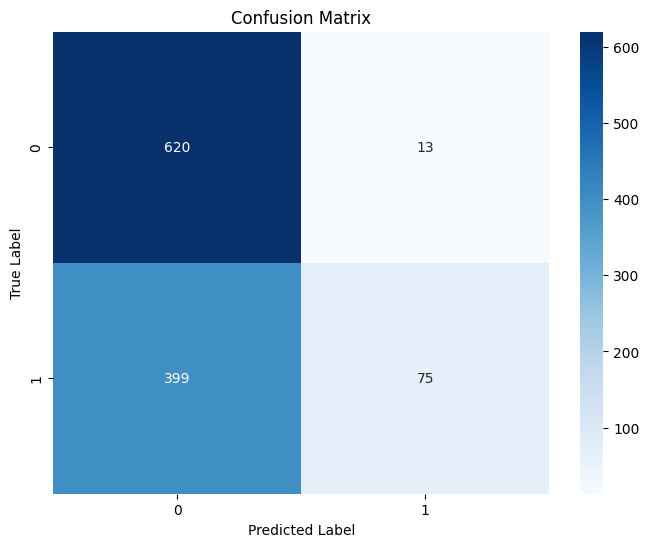

In [56]:
compute_metrics(result_df_1, "Blues")

Accuracy: 0.4905
F1 Score: 0.4655
Recall: 0.4905
Precision: 0.7097


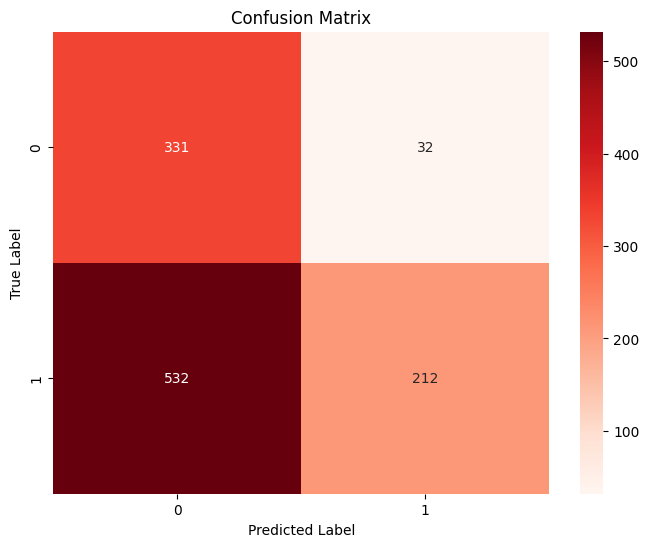

In [57]:
compute_metrics(result_df_2, "Reds")

Accuracy: 0.5763
F1 Score: 0.5600
Recall: 0.5763
Precision: 0.7159


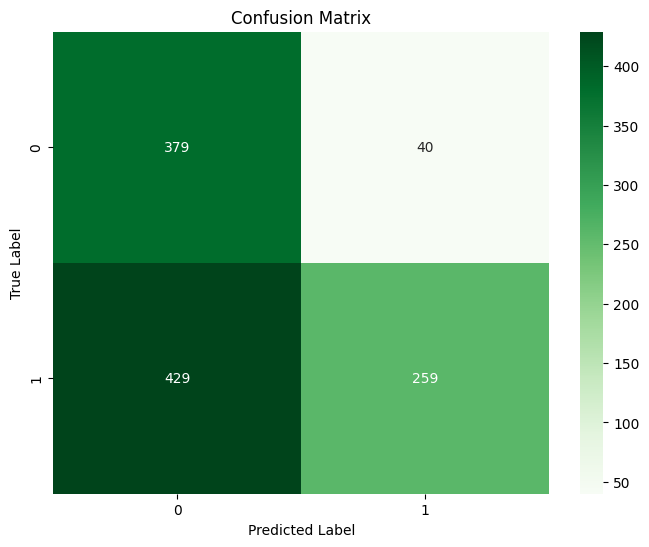

In [58]:
compute_metrics(result_df_3, "Greens")

In [59]:
# Save the DataFrame to a CSV file
result_df_1.to_csv('/content/drive/MyDrive/NLP_Project/NLP/output_English_l1.csv', index=False)
result_df_2.to_csv('/content/drive/MyDrive/NLP_Project/NLP/output_English_l2.csv', index=False)
result_df_3.to_csv('/content/drive/MyDrive/NLP_Project/NLP/output_English_l3.csv', index=False)